<a href="https://colab.research.google.com/github/ShibuGitB/task/blob/main/framingham_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
X=pd.read_csv("/content/drive/MyDrive/data sets/framingham.csv")
print (X)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [ ]:
X.drop(["education"],axis=1,inplace=True)

In [ ]:
print (X.isna().sum())

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
x=["cigsPerDay","BPMeds","totChol","heartRate","glucose"]

for i in x :

  y=X[i].mode()[0]
  X[i]=X[i].fillna(y)

In [ ]:
x=X["BMI"].mean()
X["BMI"]=X["BMI"].fillna(x)

In [ ]:
print (X.isna().sum())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [ ]:
x=X.iloc[:,0:14]
print (x)

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4235     0   48              1        20.0     0.0                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   
4238     1   40              0         0.0     0.0                0   
4239     0   39              1        30.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0                0         0    195.0  106.0   70.0  26.97       8

In [ ]:
y=X.iloc[:,14]
print (y)

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
z=MinMaxScaler()
z.fit(x)
w=z.transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(w,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
q=KNeighborsClassifier(n_neighbors=5)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

0.8349056603773585
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1085
           1       0.27      0.07      0.12       187

    accuracy                           0.83      1272
   macro avg       0.57      0.52      0.51      1272
weighted avg       0.77      0.83      0.79      1272



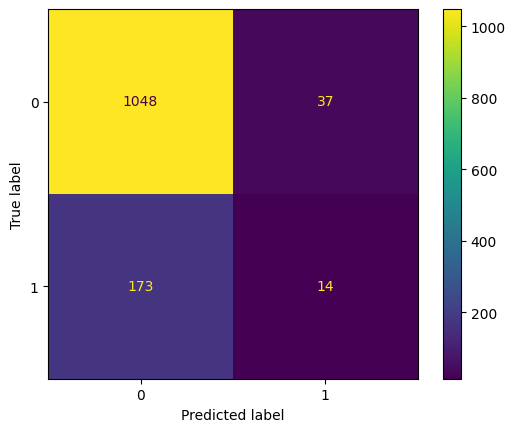

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
from sklearn.model_selection import GridSearchCV
params={"n_neighbors":[3,5,7,9],"weights":["uniform","distance"],"algorithm":["alto","ball_tree","kd_tree","brute"]}
u=GridSearchCV(q,params,cv=5,scoring="accuracy")
u.fit(x_train,y_train)
print (u.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
q=KNeighborsClassifier(n_neighbors=9,algorithm="ball_tree",weights="uniform")
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8435534591194969
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1085
           1       0.34      0.07      0.12       187

    accuracy                           0.84      1272
   macro avg       0.60      0.52      0.51      1272
weighted avg       0.78      0.84      0.80      1272



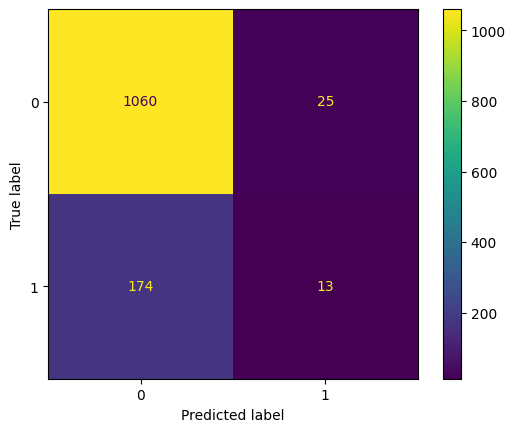

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
from sklearn.svm import SVC
q=SVC(kernel="linear")
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8529874213836478
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1085
           1       0.00      0.00      0.00       187

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.79      1272



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


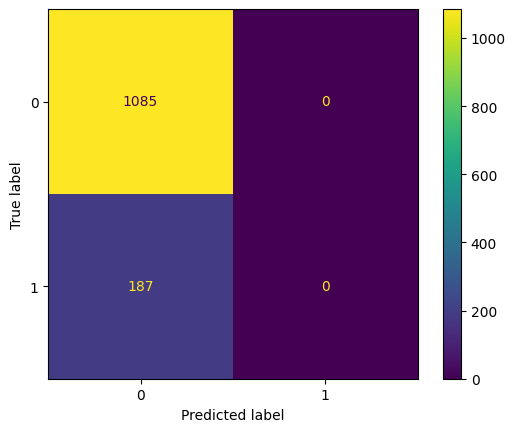

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
from sklearn.naive_bayes import GaussianNB
q=GaussianNB()
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8270440251572327
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1085
           1       0.36      0.22      0.28       187

    accuracy                           0.83      1272
   macro avg       0.62      0.58      0.59      1272
weighted avg       0.80      0.83      0.81      1272



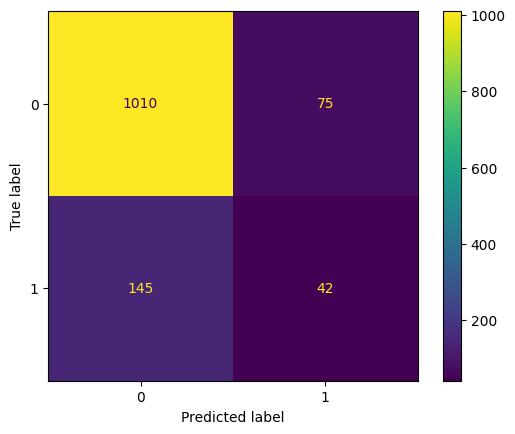

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
q=MultinomialNB()
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8553459119496856
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1085
           1       0.71      0.03      0.05       187

    accuracy                           0.86      1272
   macro avg       0.79      0.51      0.49      1272
weighted avg       0.84      0.86      0.79      1272



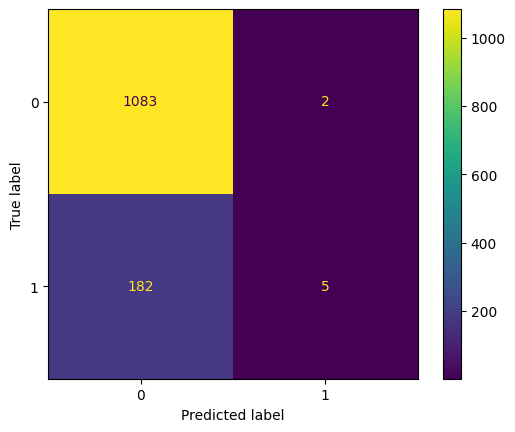

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
q=DecisionTreeClassifier(random_state=1,criterion="entropy")
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

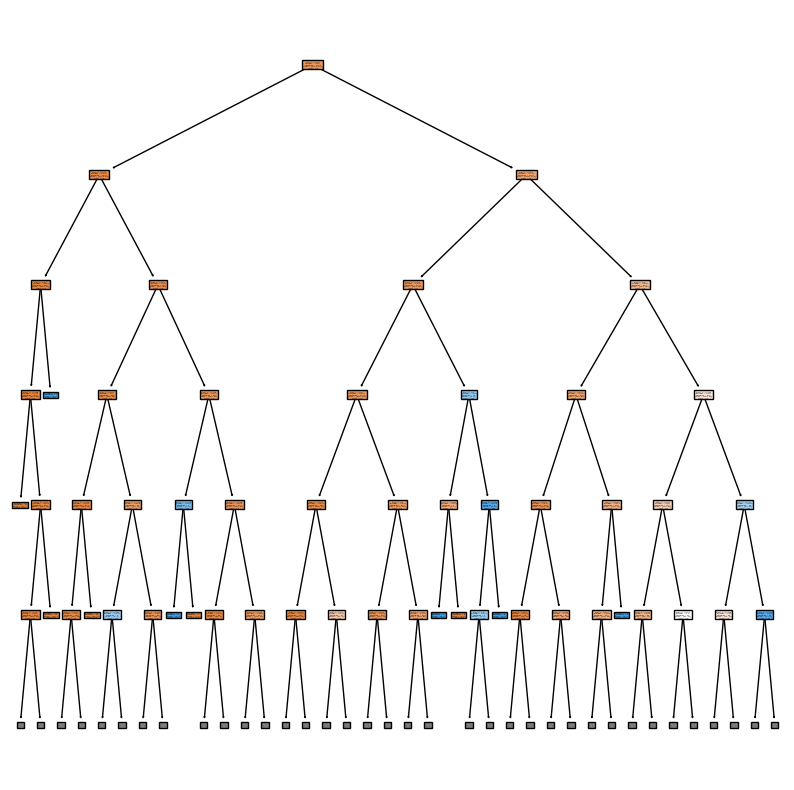

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(q,filled=True,class_names=["no","yes"],max_depth=5)
plt.show()

0.7633647798742138
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1085
           1       0.23      0.25      0.24       187

    accuracy                           0.76      1272
   macro avg       0.55      0.55      0.55      1272
weighted avg       0.77      0.76      0.77      1272



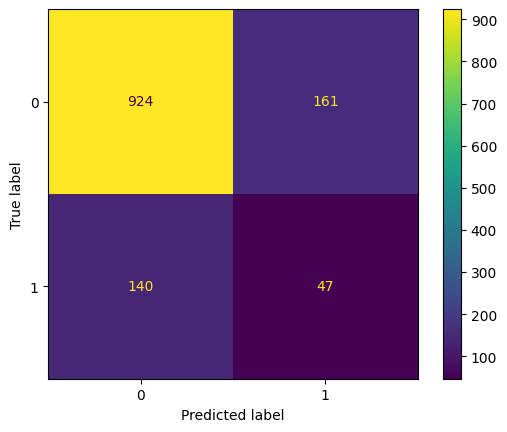

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
q=DecisionTreeClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

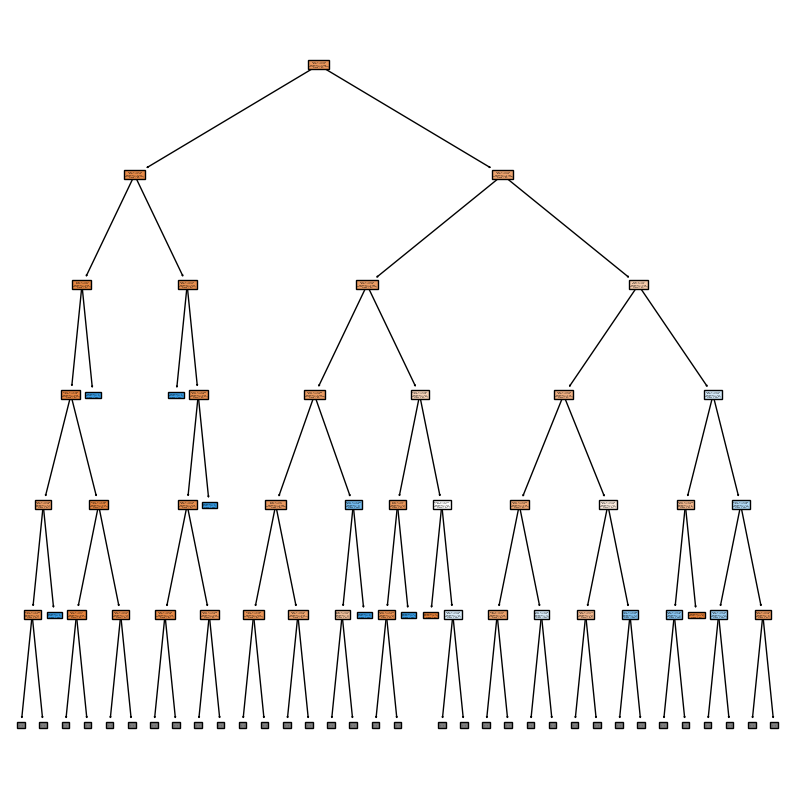

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(q,filled=True,class_names=["no","yes"],max_depth=5)
plt.show()

0.7586477987421384
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1085
           1       0.22      0.25      0.23       187

    accuracy                           0.76      1272
   macro avg       0.54      0.55      0.55      1272
weighted avg       0.77      0.76      0.77      1272



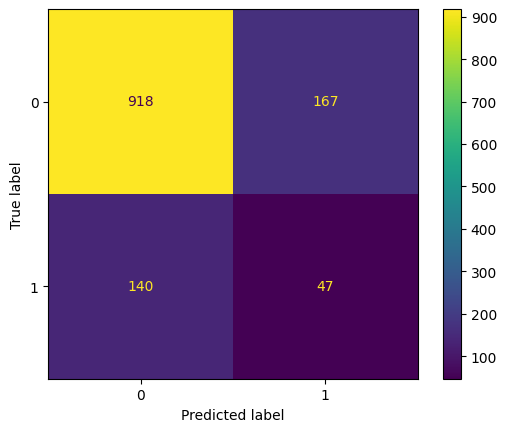

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
q=RandomForestClassifier(random_state=1,criterion="entropy",n_estimators=100)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8522012578616353
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.47      0.04      0.07       187

    accuracy                           0.85      1272
   macro avg       0.66      0.52      0.49      1272
weighted avg       0.80      0.85      0.79      1272



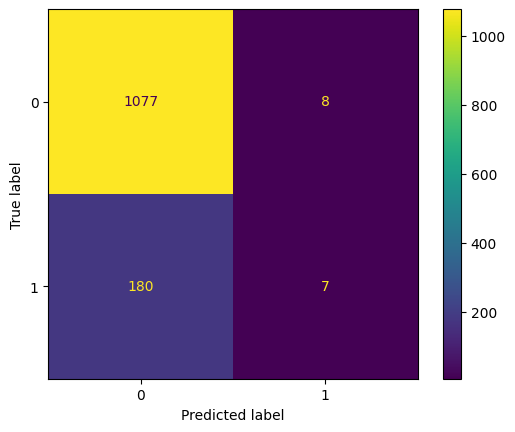

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
q=AdaBoostClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8514150943396226
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1085
           1       0.46      0.06      0.11       187

    accuracy                           0.85      1272
   macro avg       0.66      0.53      0.52      1272
weighted avg       0.80      0.85      0.80      1272



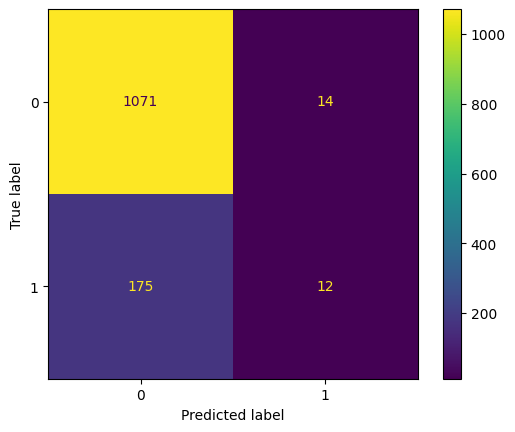

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
from xgboost import XGBClassifier
q=XGBClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8466981132075472
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1085
           1       0.43      0.13      0.20       187

    accuracy                           0.85      1272
   macro avg       0.65      0.55      0.56      1272
weighted avg       0.80      0.85      0.81      1272



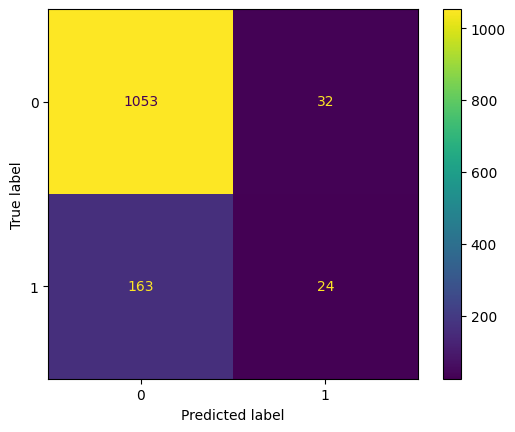

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
print (X["TenYearCHD"].value_counts())

0    3596
1     644
Name: TenYearCHD, dtype: int64


over sampling

In [ ]:
from imblearn.over_sampling import SMOTE
q=SMOTE(random_state=1)
x_os,y_os=q.fit_resample(x,y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
z=MinMaxScaler()
z.fit(x_os)
w=z.transform(x_os)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(w,y_os,test_size=0.3,random_state=1)

In [ ]:
q=KNeighborsClassifier(n_neighbors=3)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.7956441149212233
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1074
           1       0.76      0.87      0.81      1084

    accuracy                           0.80      2158
   macro avg       0.80      0.80      0.79      2158
weighted avg       0.80      0.80      0.79      2158



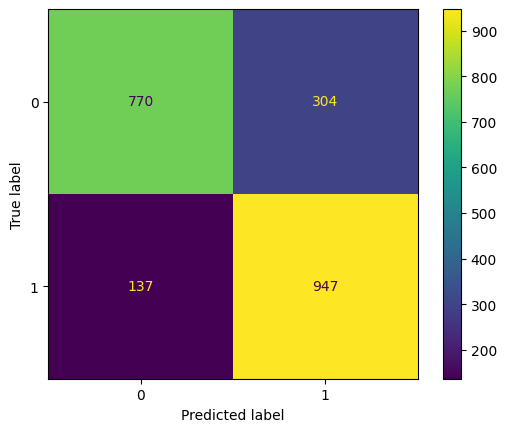

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
params={"n_neighbors":[3,5,7,9],"weights":["uniform","distance"],"algorithm":["auto","ball_tree","kd_tree","brute"]}
w=GridSearchCV(q,params,cv=5,scoring="accuracy")
w.fit(x_train,y_train)
print (w.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
q=KNeighborsClassifier(n_neighbors=3,weights="distance",algorithm="auto")
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8053753475440223
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      1074
           1       0.76      0.89      0.82      1084

    accuracy                           0.81      2158
   macro avg       0.81      0.80      0.80      2158
weighted avg       0.81      0.81      0.80      2158



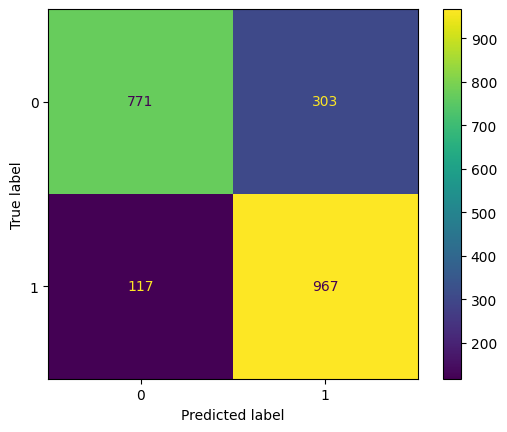

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=SVC(kernel="linear")
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.6807228915662651
              precision    recall  f1-score   support

           0       0.69      0.64      0.67      1074
           1       0.67      0.72      0.69      1084

    accuracy                           0.68      2158
   macro avg       0.68      0.68      0.68      2158
weighted avg       0.68      0.68      0.68      2158



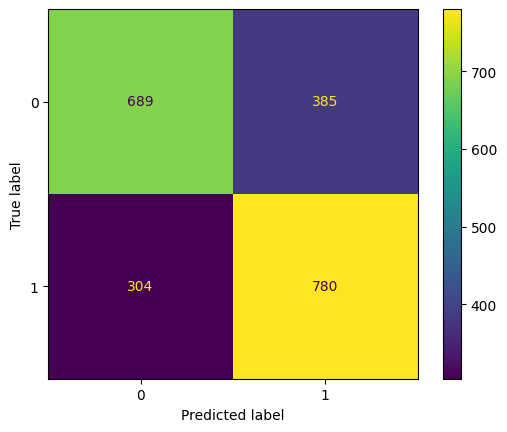

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=GaussianNB()
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.6153846153846154
              precision    recall  f1-score   support

           0       0.58      0.85      0.69      1074
           1       0.72      0.38      0.50      1084

    accuracy                           0.62      2158
   macro avg       0.65      0.62      0.59      2158
weighted avg       0.65      0.62      0.59      2158



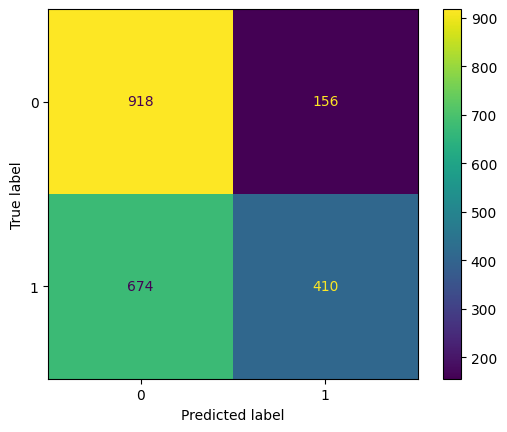

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=MultinomialNB()
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.5857275254865616
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1074
           1       0.59      0.59      0.59      1084

    accuracy                           0.59      2158
   macro avg       0.59      0.59      0.59      2158
weighted avg       0.59      0.59      0.59      2158



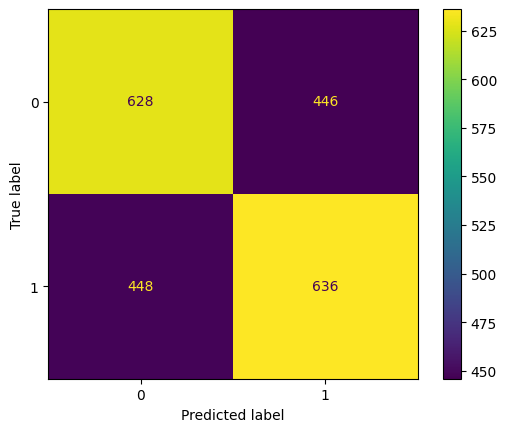

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=DecisionTreeClassifier(random_state=1,criterion="entropy")
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

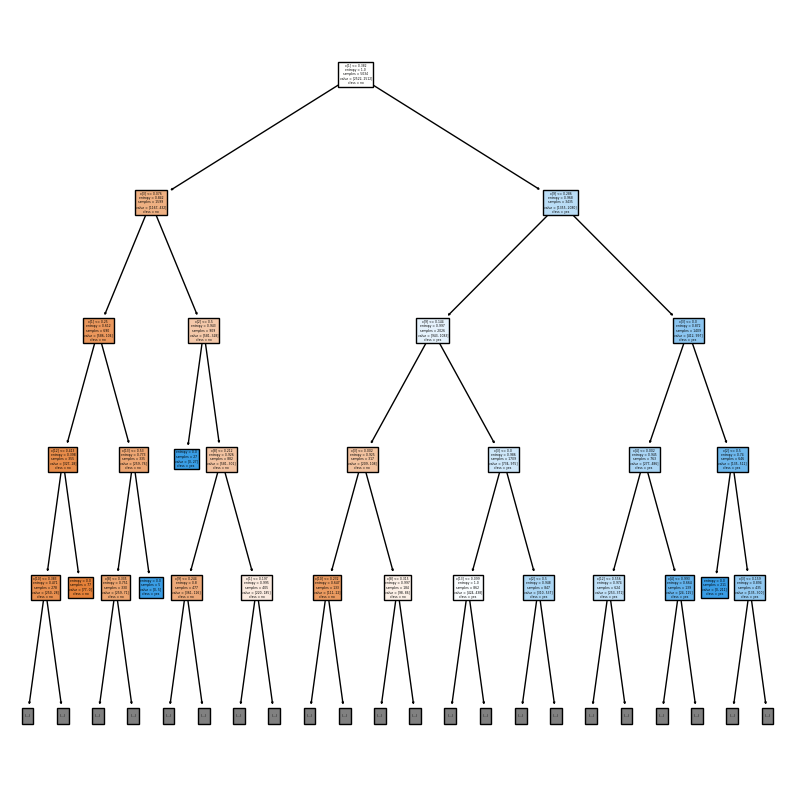

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(q,filled=True,class_names=["no","yes"],max_depth=4)
plt.show()

0.7914735866543096
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1074
           1       0.78      0.81      0.80      1084

    accuracy                           0.79      2158
   macro avg       0.79      0.79      0.79      2158
weighted avg       0.79      0.79      0.79      2158



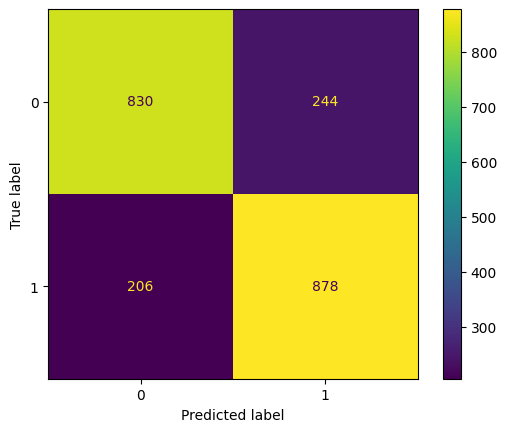

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=DecisionTreeClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

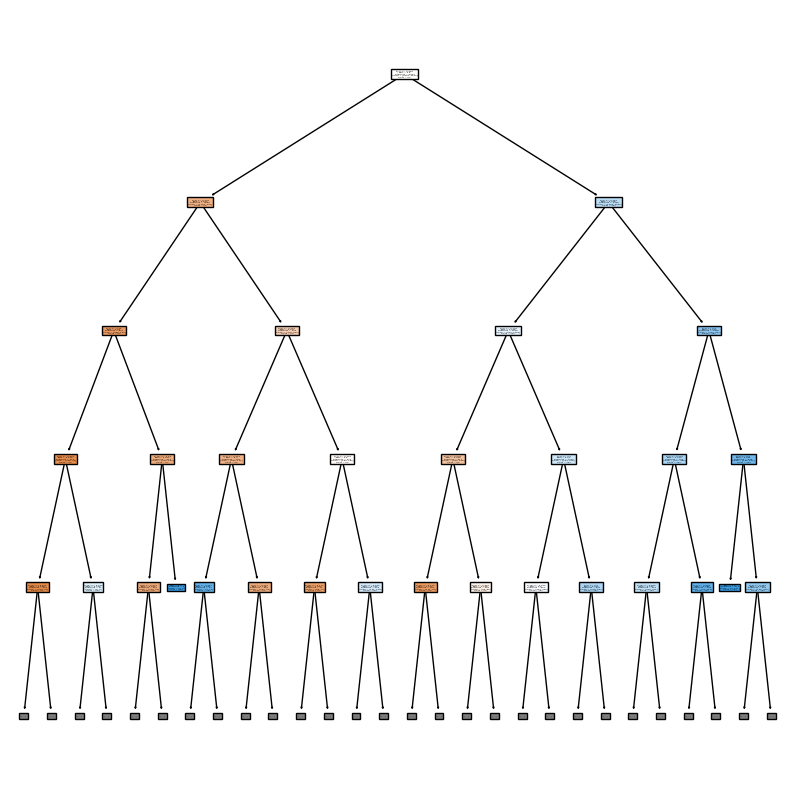

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(q,filled=True,class_names=["no","yes"],max_depth=4)
plt.show()

0.7900834105653383
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1074
           1       0.78      0.82      0.80      1084

    accuracy                           0.79      2158
   macro avg       0.79      0.79      0.79      2158
weighted avg       0.79      0.79      0.79      2158



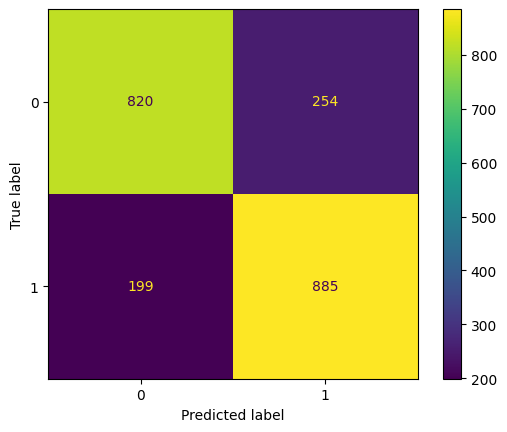

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=RandomForestClassifier(random_state=1,criterion="entropy",n_estimators=100)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8887859128822985
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1074
           1       0.90      0.88      0.89      1084

    accuracy                           0.89      2158
   macro avg       0.89      0.89      0.89      2158
weighted avg       0.89      0.89      0.89      2158



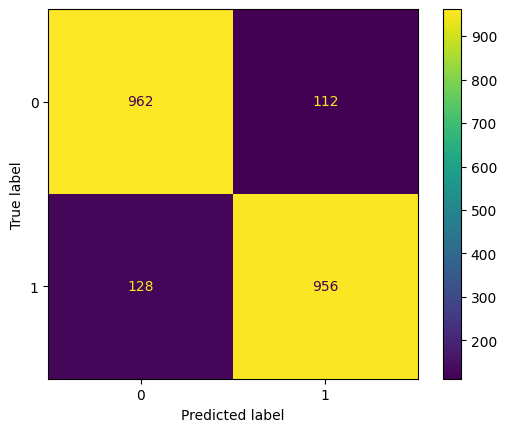

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=RandomForestClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8911028730305839
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1074
           1       0.90      0.89      0.89      1084

    accuracy                           0.89      2158
   macro avg       0.89      0.89      0.89      2158
weighted avg       0.89      0.89      0.89      2158



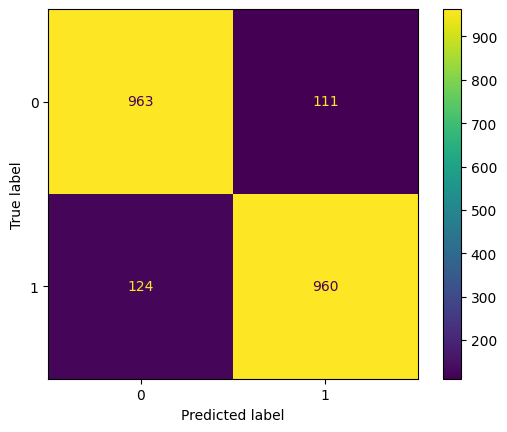

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=AdaBoostClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.7516218721037998
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1074
           1       0.75      0.75      0.75      1084

    accuracy                           0.75      2158
   macro avg       0.75      0.75      0.75      2158
weighted avg       0.75      0.75      0.75      2158



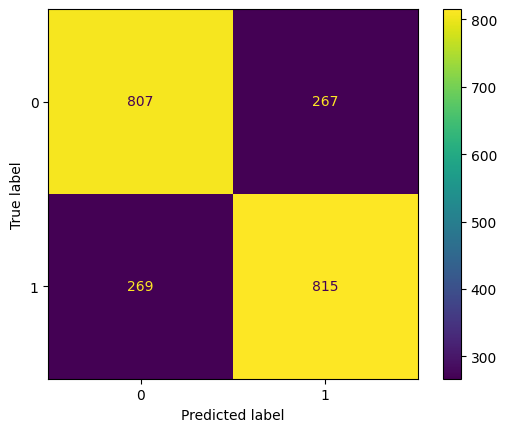

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=XGBClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.8744207599629287
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1074
           1       0.89      0.85      0.87      1084

    accuracy                           0.87      2158
   macro avg       0.88      0.87      0.87      2158
weighted avg       0.88      0.87      0.87      2158



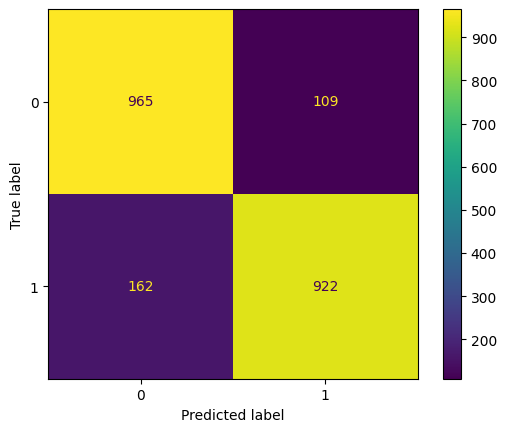

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
z=RandomUnderSampler(random_state=1)
x_us,y_us=z.fit_resample(x,y)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
z=MinMaxScaler()
z.fit(x_us)
w=z.transform(x_us)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(w,y_us,test_size=0.3,random_state=1)

In [ ]:
q=KNeighborsClassifier(n_neighbors=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.5555555555555556
              precision    recall  f1-score   support

           0       0.56      0.59      0.57       196
           1       0.55      0.52      0.54       191

    accuracy                           0.56       387
   macro avg       0.56      0.56      0.55       387
weighted avg       0.56      0.56      0.56       387



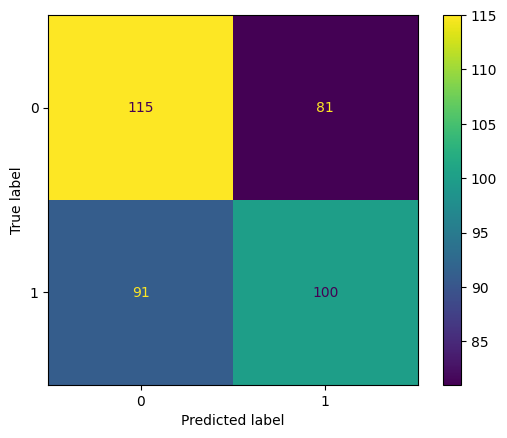

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
params={"n_neighbors":[3,5,7,9],"weights":["uniform","distance"],"algorithm":["auto","ball_tree","kd_tree","brute"]}
w=GridSearchCV(q,params,cv=5,scoring="accuracy")
w.fit(x_train,y_train)
print (w.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


In [ ]:
q=KNeighborsClassifier(n_neighbors=9,weights="uniform",algorithm="auto")
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.6175710594315246
              precision    recall  f1-score   support

           0       0.62      0.65      0.63       196
           1       0.62      0.58      0.60       191

    accuracy                           0.62       387
   macro avg       0.62      0.62      0.62       387
weighted avg       0.62      0.62      0.62       387



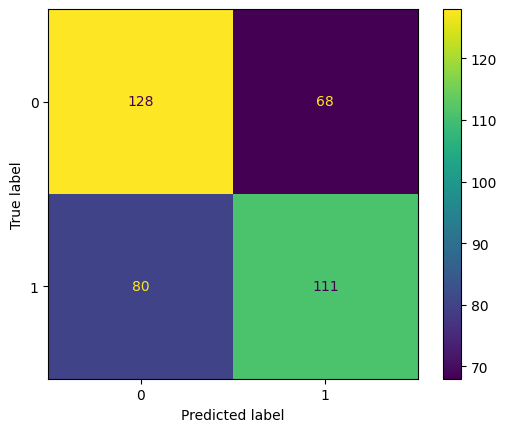

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=SVC(kernel="linear")
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.6666666666666666
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       196
           1       0.64      0.72      0.68       191

    accuracy                           0.67       387
   macro avg       0.67      0.67      0.67       387
weighted avg       0.67      0.67      0.67       387



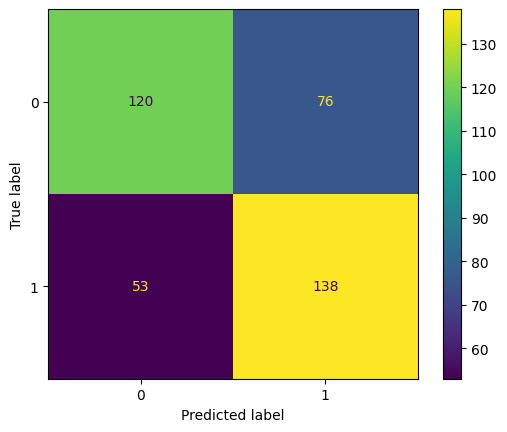

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=GaussianNB()
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.5710594315245479
              precision    recall  f1-score   support

           0       0.54      0.98      0.70       196
           1       0.88      0.15      0.26       191

    accuracy                           0.57       387
   macro avg       0.71      0.57      0.48       387
weighted avg       0.71      0.57      0.48       387



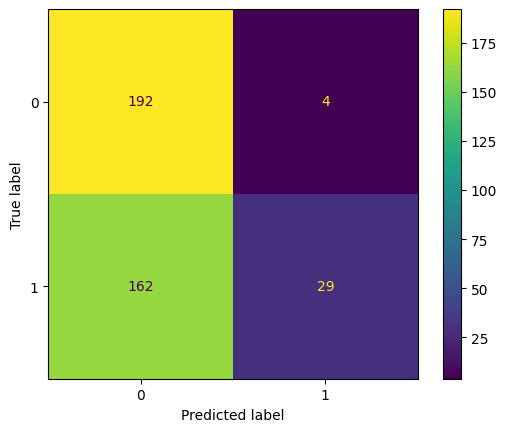

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=MultinomialNB()
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.6175710594315246
              precision    recall  f1-score   support

           0       0.61      0.68      0.64       196
           1       0.63      0.55      0.59       191

    accuracy                           0.62       387
   macro avg       0.62      0.62      0.62       387
weighted avg       0.62      0.62      0.62       387



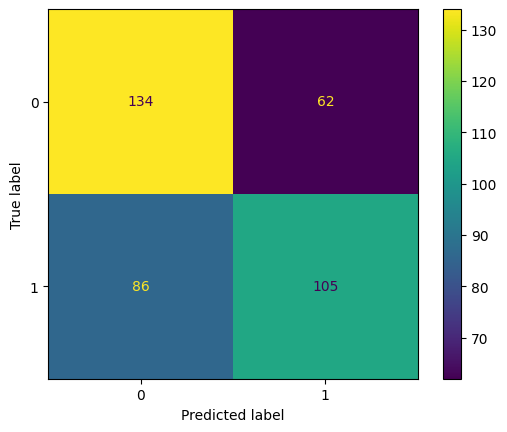

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=DecisionTreeClassifier(random_state=1,criterion="entropy")
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

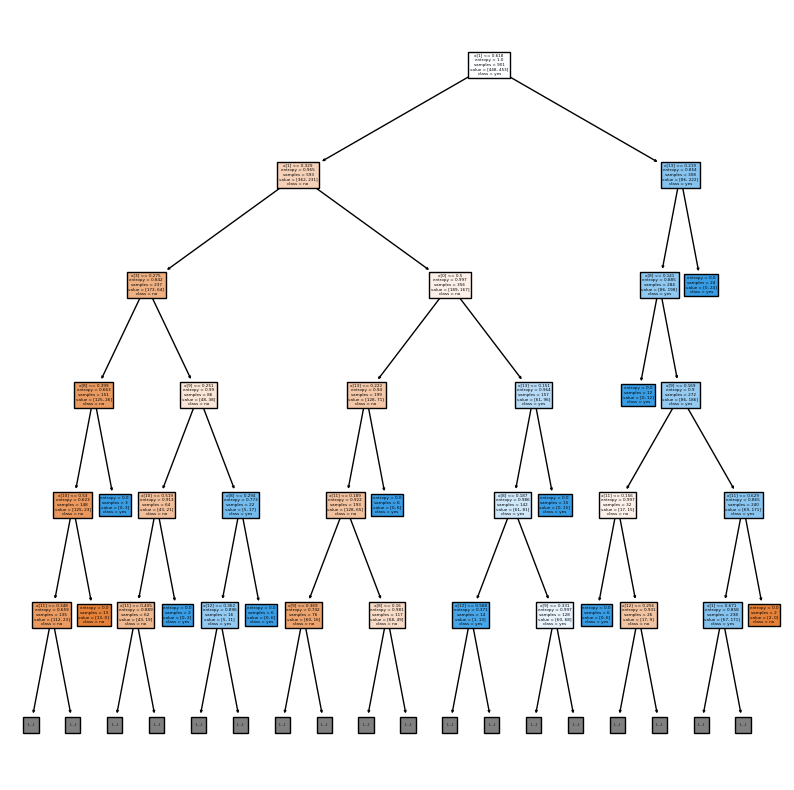

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(q,filled=True,class_names=["no","yes"],max_depth=5)
plt.show()

0.5762273901808785
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       196
           1       0.57      0.57      0.57       191

    accuracy                           0.58       387
   macro avg       0.58      0.58      0.58       387
weighted avg       0.58      0.58      0.58       387



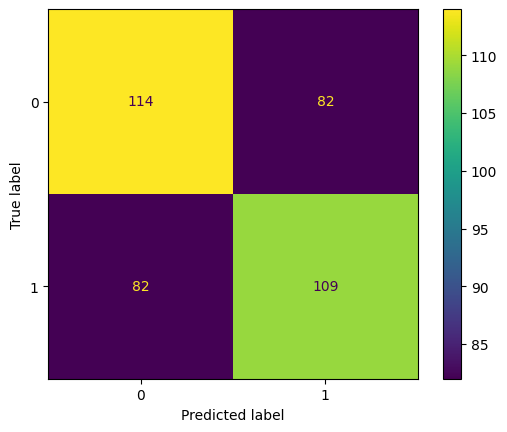

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=DecisionTreeClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.5943152454780362
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       196
           1       0.58      0.62      0.60       191

    accuracy                           0.59       387
   macro avg       0.59      0.59      0.59       387
weighted avg       0.60      0.59      0.59       387



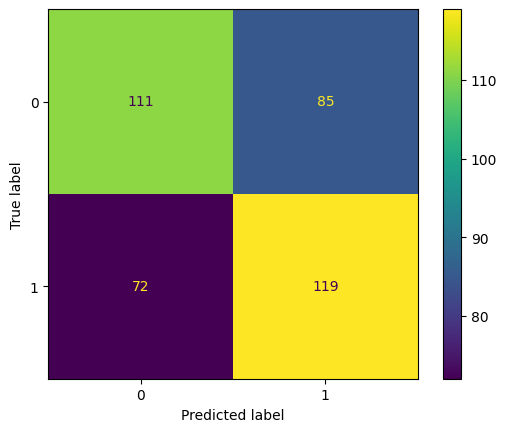

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=RandomForestClassifier(random_state=1,criterion="entropy",n_estimators=100)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.6201550387596899
              precision    recall  f1-score   support

           0       0.64      0.58      0.61       196
           1       0.60      0.66      0.63       191

    accuracy                           0.62       387
   macro avg       0.62      0.62      0.62       387
weighted avg       0.62      0.62      0.62       387



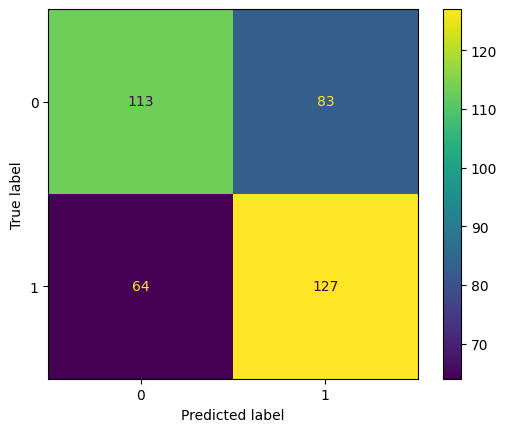

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=RandomForestClassifier(random_state=1,n_estimators=100)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.6253229974160207
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       196
           1       0.60      0.70      0.65       191

    accuracy                           0.63       387
   macro avg       0.63      0.63      0.62       387
weighted avg       0.63      0.63      0.62       387



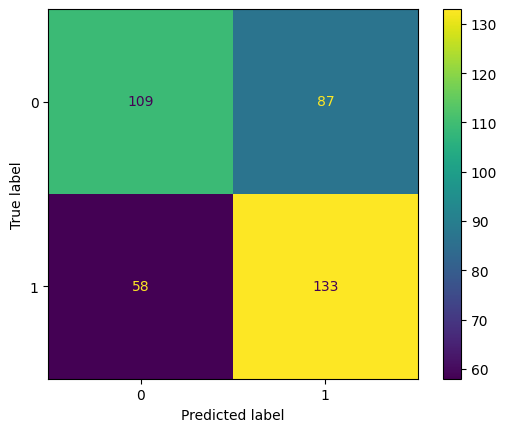

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=AdaBoostClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.6149870801033591
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       196
           1       0.60      0.64      0.62       191

    accuracy                           0.61       387
   macro avg       0.62      0.62      0.61       387
weighted avg       0.62      0.61      0.61       387



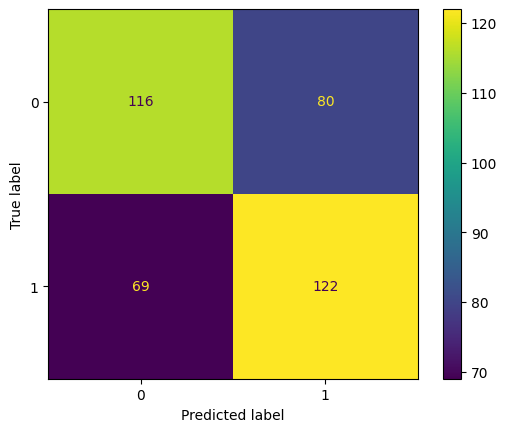

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
q=XGBClassifier(random_state=1)
q.fit(x_train,y_train)
l=q.predict(x_test)
o=y_test.values

0.5968992248062015
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       196
           1       0.58      0.67      0.62       191

    accuracy                           0.60       387
   macro avg       0.60      0.60      0.60       387
weighted avg       0.60      0.60      0.59       387



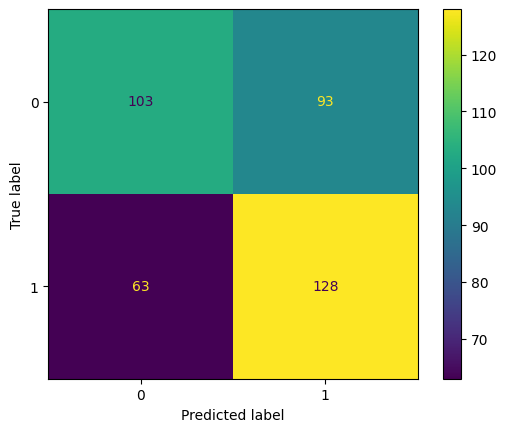

In [ ]:
print (accuracy_score(o,l))
print (ConfusionMatrixDisplay.from_predictions(o,l))
print (classification_report(o,l))

In [ ]:
# got a best machine learning model at over sampling ensemble machine learning algorithm bagging methods random forest classifier at
# criterion=gini index on accuracy 89 and precision 90 , recall 89